In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_excel("D:\own_data_1.xlsx")

In [45]:
df.head()

,Date,Timestamp,GyroscopeX,GyroscopeY,GyroscopeZ,AccelerationX,AccelerationY,AccelerationZ,Label
0,2022-07-26 19:24:15,1.658844e+09,-0.424806,-0.654120,0.260132,-0.002014,-0.340256,-1.272156,walking_upstairs
1,2022-07-26 19:24:15,1.658844e+09,-0.116530,-0.400120,0.165681,-0.114716,-0.278885,-1.183762,walking_upstairs
2,2022-07-26 19:24:15,1.658844e+09,0.251794,-0.007258,0.211877,-0.121811,-0.246017,-1.011688,walking_upstairs
3,2022-07-26 19:24:15,1.658844e+09,0.442580,-0.675886,0.014152,-0.100815,-0.295563,-0.878433,walking_upstairs
4,2022-07-26 19:24:15,1.658844e+09,0.395401,-0.364630,-0.572730,-0.142670,-0.330124,-0.833084,walking_upstairs


In [46]:
df.tail()

,Date,Timestamp,GyroscopeX,GyroscopeY,GyroscopeZ,AccelerationX,AccelerationY,AccelerationZ,Label
8612,2022-07-29 09:34:53,1.659068e+09,0.130778,0.099054,0.273642,0.111298,-0.047180,-0.916061,laying
8613,2022-07-29 09:34:53,1.659068e+09,0.323205,0.334678,0.361874,0.203308,-0.080200,-0.987793,laying
8614,2022-07-29 09:34:53,1.659068e+09,0.393601,-0.180618,0.262662,0.058792,-0.114822,-0.916382,laying
8615,2022-07-29 09:34:53,1.659068e+09,0.284711,-0.214343,0.244468,0.199036,-0.138046,-0.965408,laying
8616,2022-07-29 09:34:53,1.659068e+09,0.154983,-0.307686,0.265722,0.118591,-0.117081,-0.955917,laying


In [47]:
df = df.drop('Timestamp', axis=1)

In [48]:
df.head()

,Date,GyroscopeX,GyroscopeY,GyroscopeZ,AccelerationX,AccelerationY,AccelerationZ,Label
0,2022-07-26 19:24:15,-0.424806,-0.654120,0.260132,-0.002014,-0.340256,-1.272156,walking_upstairs
1,2022-07-26 19:24:15,-0.116530,-0.400120,0.165681,-0.114716,-0.278885,-1.183762,walking_upstairs
2,2022-07-26 19:24:15,0.251794,-0.007258,0.211877,-0.121811,-0.246017,-1.011688,walking_upstairs
3,2022-07-26 19:24:15,0.442580,-0.675886,0.014152,-0.100815,-0.295563,-0.878433,walking_upstairs
4,2022-07-26 19:24:15,0.395401,-0.364630,-0.572730,-0.142670,-0.330124,-0.833084,walking_upstairs


In [49]:

df = df.drop('Date', axis = 1)

In [50]:
df.head()

,GyroscopeX,GyroscopeY,GyroscopeZ,AccelerationX,AccelerationY,AccelerationZ,Label
0,-0.424806,-0.654120,0.260132,-0.002014,-0.340256,-1.272156,walking_upstairs
1,-0.116530,-0.400120,0.165681,-0.114716,-0.278885,-1.183762,walking_upstairs
2,0.251794,-0.007258,0.211877,-0.121811,-0.246017,-1.011688,walking_upstairs
3,0.442580,-0.675886,0.014152,-0.100815,-0.295563,-0.878433,walking_upstairs
4,0.395401,-0.364630,-0.572730,-0.142670,-0.330124,-0.833084,walking_upstairs


In [51]:
activities = df['Label'].unique()

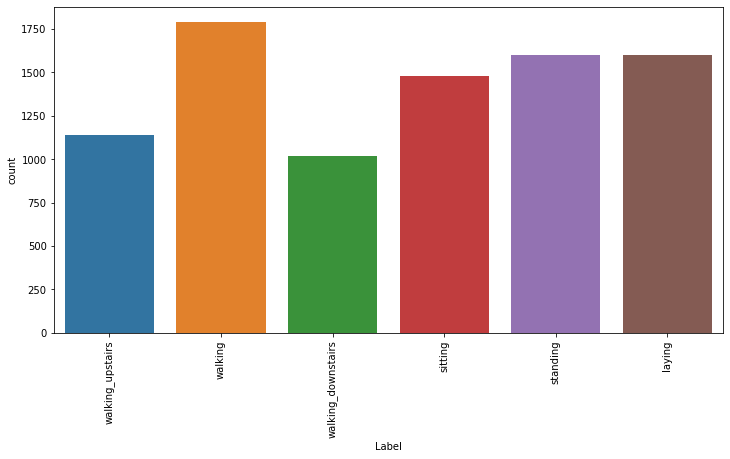

In [52]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Label",data=df)
plt.xticks(x=df['Label'],rotation ='vertical')
plt.show()

In [53]:
X=pd.DataFrame(df.drop(['Label'],axis=1))
y=df.Label.values.astype(object)

In [54]:
X.shape, y.shape

((8617, 6), (8617,))

In [55]:
X.head()

,GyroscopeX,GyroscopeY,GyroscopeZ,AccelerationX,AccelerationY,AccelerationZ
0,-0.424806,-0.654120,0.260132,-0.002014,-0.340256,-1.272156
1,-0.116530,-0.400120,0.165681,-0.114716,-0.278885,-1.183762
2,0.251794,-0.007258,0.211877,-0.121811,-0.246017,-1.011688
3,0.442580,-0.675886,0.014152,-0.100815,-0.295563,-0.878433
4,0.395401,-0.364630,-0.572730,-0.142670,-0.330124,-0.833084


In [56]:
y[5]

'walking_upstairs'

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8617 entries, 0 to 8616
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GyroscopeX     8617 non-null   float64
 1   GyroscopeY     8617 non-null   float64
 2   GyroscopeZ     8617 non-null   float64
 3   AccelerationX  8617 non-null   float64
 4   AccelerationY  8617 non-null   float64
 5   AccelerationZ  8617 non-null   float64
dtypes: float64(6)
memory usage: 404.0 KB


In [58]:
num_cols = X._get_numeric_data().columns
print("number of numeric features: ", num_cols.size)

number of numeric features:  6


In [59]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [60]:
encoder.fit(y)
y = encoder.transform(y)
y.shape

(8617,)

In [61]:
y

array([5, 5, 5, ..., 0, 0, 0])

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6893, 6), (1724, 6), (6893,), (1724,))

In [66]:
from sklearn import metrics
from sklearn.metrics import * 
from sklearn.model_selection import cross_val_score, GridSearchCV

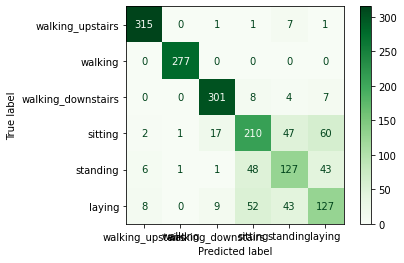

Total accuracy is:  0.787122969837587


In [67]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred1 = dtc.predict(X_test)
conf_mat = confusion_matrix(y_pred1, y_test)
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = activities)
conf_mat_disp.plot(cmap = 'Greens')
plt.show()
print("Total accuracy is: ", metrics.accuracy_score(y_test,y_pred1))

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

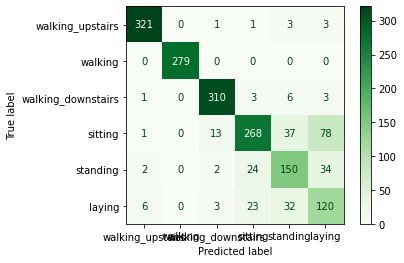

Total accuracy is:  0.839907192575406


In [69]:
y_pred1 = rfc.predict(X_test)
conf_mat = confusion_matrix(y_pred1, y_test)
conf_mat_disp = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = activities)
conf_mat_disp.plot(cmap = 'Greens')
plt.show()
print("Total accuracy is: ", metrics.accuracy_score(y_test,y_pred1))

In [70]:
from sklearn.svm import SVC

In [71]:
svc = SVC()
svc.fit(X_train, y_train)
SVC()

SVC()

In [72]:
y_pred = svc.predict(X_test)

In [73]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8353


Using knn


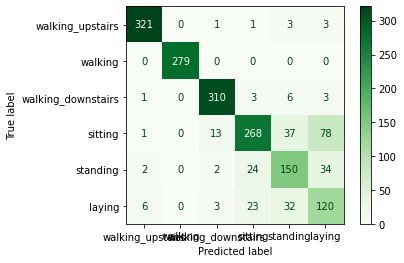

Total accuracy is:  0.8433874709976799


In [74]:
from sklearn.neighbors import  KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric ="minkowski", p=2)
classifier.fit(X_train,y_train)
y_pred4 = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred4)
conf_mat_diap = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels= activities)
conf_mat_disp.plot(cmap='Greens')
print("Using knn")
plt.show()
print("Total accuracy is: ",metrics.accuracy_score(y_test,y_pred4))
